## Analysis of Housing data

Hi there 👋, Please find inside this repository a code which analyses the housing cost based on relevant housing information.

Estimating the price of a house is an important step for new home buyers. This dataset indicates some using features in estimating the sale price of a house. In this analysis, I demonstrate and compare using of Principal component regression, model selection and ordinary linear regression in predicting the Sales price.

Furthermore, I have added few visualisations and descriptive steps during the cleaning of the dataset to offer additional insight on the data presented and answer some of the questions below:

    🤔 Is my dataset complete or does it contain nulls?
    🤔 What are my categorical features and could I encode them?
    🤔 Are all my datatypes correct?
    👯 and many more...

It is still a work in progress and open to suggestions.

Cheers. W

In [ ]:
import pandas as pd
house = pd.read_csv('house_small.csv')

In [ ]:
house.head()

,Unnamed: 0,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Property_Type,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,House_Sale_Price
0,1,2400,9373,3.00,6,7,Multiplex,2,0,1991,0,False,300805.0
1,2,3764,20156,3.75,4,10,Single Family,1,1452,2005,0,True,1076162.0
2,3,2060,26036,1.75,4,8,Single Family,1,900,1947,0,False,761805.0
3,4,3200,8618,3.75,5,7,Single Family,1,1640,1966,0,False,442065.0
4,5,1720,8620,1.75,4,7,Single Family,1,0,1948,0,False,297065.0


In [ ]:
house = house.drop(labels=['Unnamed: 0'], axis=1)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22689 entries, 0 to 22688
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sq_Ft_Tot_Living    22689 non-null  int64  
 1   Sq_Ft_Lot           22689 non-null  int64  
 2   Bathroom_count      22689 non-null  float64
 3   Bedroom_count       22689 non-null  int64  
 4   Bldg_Grade          22689 non-null  int64  
 5   Property_Type       22689 non-null  object 
 6   Nbr_Living_Units    22689 non-null  int64  
 7   Sq_Ft_Fin_Basement  22689 non-null  int64  
 8   Yr_Built            22689 non-null  int64  
 9   Yr_Renovated        22689 non-null  int64  
 10  Newly_Construction  22689 non-null  bool   
 11  House_Sale_Price    22689 non-null  float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 1.9+ MB


In [ ]:
house.describe(include='all')

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Property_Type,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,House_Sale_Price
count,22689.000000,2.268900e+04,22689.000000,22689.000000,22689.000000,22689,22689.000000,22689.000000,22689.000000,22689.000000,22689,2.268900e+04
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,Single Family,NaN,NaN,NaN,NaN,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,20722,NaN,NaN,NaN,NaN,20295,NaN
mean,2080.258275,1.174621e+04,2.176550,3.367843,7.680991,NaN,1.018820,293.240072,1971.194588,102.305743,NaN,5.652523e+05
std,913.791565,2.901475e+04,0.768044,0.904414,1.180565,NaN,0.159745,439.449560,30.315556,440.560634,NaN,3.854195e+05
min,370.000000,4.940000e+02,0.000000,0.000000,3.000000,NaN,1.000000,0.000000,1900.000000,0.000000,NaN,3.368000e+03
25%,1420.000000,4.800000e+03,1.750000,3.000000,7.000000,NaN,1.000000,0.000000,1950.000000,0.000000,NaN,3.605630e+05
50%,1910.000000,7.200000e+03,2.250000,3.000000,7.000000,NaN,1.000000,0.000000,1977.000000,0.000000,NaN,4.713150e+05
75%,2540.000000,9.794000e+03,2.500000,4.000000,8.000000,NaN,1.000000,580.000000,2000.000000,0.000000,NaN,6.494430e+05


Do you have any missing values?

You can see that there are 3 distinct type of properties. Convert this column to one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [ ]:
Property_Encoded = pd.DataFrame(enc.fit_transform(house[['Property_Type']]).toarray())

In [ ]:
Property_Encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22689 entries, 0 to 22688
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       22689 non-null  int32
 1   1       22689 non-null  int32
 2   2       22689 non-null  int32
dtypes: int32(3)
memory usage: 266.0 KB


In [ ]:
def to_num (Lister):
    for i in range(0, len(Lister.columns)):
        Lister[i] = (Lister[i]).astype(int)

In [ ]:
to_num(Property_Encoded)

In [ ]:
Property_Encoded.head(1)

,Property_Multiplex,Property_Single Family,Property_Townhouse
0,1,0,0


In [ ]:
house['Property_Type'].unique()

array(['Multiplex', 'Single Family', 'Townhouse'], dtype=object)

In [ ]:
Property_Encoded.columns = ['Property_Multiplex','Property_Single Family', 'Property_Townhouse']

In [ ]:
New_house = pd.merge(house, Property_Encoded, on=house.index)

In [ ]:
New_house.drop(['key_0','Property_Type'], axis= 1, inplace=True)

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,House_Sale_Price,Property_Multiplex,Property_Single Family,Property_Townhouse
0,2400,9373,3.00,6,7,2,0,1991,0,False,300805.0,1,0,0
1,3764,20156,3.75,4,10,1,1452,2005,0,True,1076162.0,0,1,0
2,2060,26036,1.75,4,8,1,900,1947,0,False,761805.0,0,1,0
3,3200,8618,3.75,5,7,1,1640,1966,0,False,442065.0,0,1,0
4,1720,8620,1.75,4,7,1,0,1948,0,False,297065.0,0,1,0


Next, one of the column is of datatype boolean. Convert it to numeric type. 

In [ ]:
New_house['Newly_Construction'] = New_house.Newly_Construction.factorize()[0]

In [ ]:
# quick check to see what I am doing
for i in range(0, len(New_house['Newly_Construction'])):
    if New_house['Newly_Construction'].iloc[i] == 1:
        pass #print(i)

In [ ]:
 New_house['Newly_Construction'].iloc[7]

0

In [ ]:
New_house.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22689 entries, 0 to 22688
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sq_Ft_Tot_Living        22689 non-null  int64  
 1   Sq_Ft_Lot               22689 non-null  int64  
 2   Bathroom_count          22689 non-null  float64
 3   Bedroom_count           22689 non-null  int64  
 4   Bldg_Grade              22689 non-null  int64  
 5   Nbr_Living_Units        22689 non-null  int64  
 6   Sq_Ft_Fin_Basement      22689 non-null  int64  
 7   Yr_Built                22689 non-null  int64  
 8   Yr_Renovated            22689 non-null  int64  
 9   Newly_Construction      22689 non-null  int64  
 10  House_Sale_Price        22689 non-null  float64
 11  Property_Multiplex      22689 non-null  int32  
 12  Property_Single Family  22689 non-null  int32  
 13  Property_Townhouse      22689 non-null  int32  
dtypes: float64(2), int32(3), int64(9)
memo

In [ ]:
New_house.head(6)

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,House_Sale_Price,Property_Multiplex,Property_Single Family,Property_Townhouse
0,2400,9373,3.00,6,7,2,0,1991,0,0,300805.0,1,0,0
1,3764,20156,3.75,4,10,1,1452,2005,0,1,1076162.0,0,1,0
2,2060,26036,1.75,4,8,1,900,1947,0,0,761805.0,0,1,0
3,3200,8618,3.75,5,7,1,1640,1966,0,0,442065.0,0,1,0
4,1720,8620,1.75,4,7,1,0,1948,0,0,297065.0,0,1,0
5,930,1012,1.50,2,8,1,0,2008,0,1,411781.0,0,0,1


,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,House_Sale_Price,Property_Multiplex,Property_Single Family,Property_Townhouse,Newly_Construction2
0,2400,9373,3.00,6,7,2,0,1991,0,False,300805.0,1,0,0,0
1,3764,20156,3.75,4,10,1,1452,2005,0,True,1076162.0,0,1,0,1
2,2060,26036,1.75,4,8,1,900,1947,0,False,761805.0,0,1,0,0
3,3200,8618,3.75,5,7,1,1640,1966,0,False,442065.0,0,1,0,0
4,1720,8620,1.75,4,7,1,0,1948,0,False,297065.0,0,1,0,0


You cannot use the features written below as you must have added some features of your own for one-hot and converting the data types

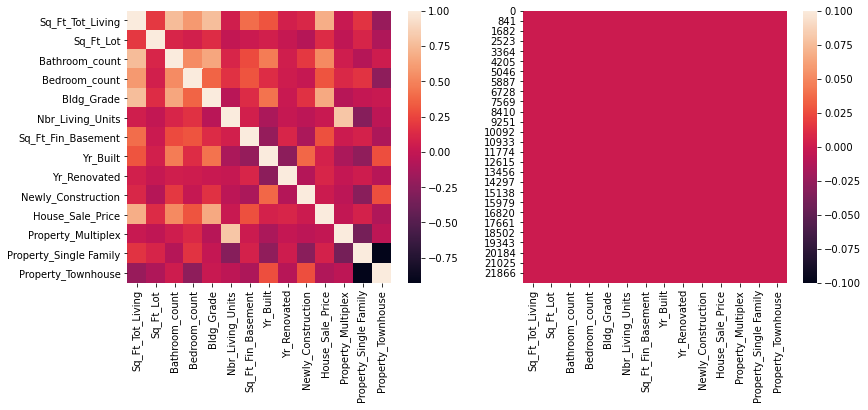

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(13, 5))
sns.heatmap(New_house.corr(), ax=ax[0]) # Somewhat a spread out correlation
sns.heatmap(New_house.isnull(), ax=ax[1]); # Missing values none

### Preparing my main datasets

In [ ]:
predictors = ['Sq_Ft_Tot_Living', 'Sq_Ft_Lot', 'Bathroom_count', 'Bedroom_count',
              'Bldg_Grade', 'Nbr_Living_Units', 'Sq_Ft_Fin_Basement', 
              'Yr_Built', 'Yr_Renovated', 'Newly_Construction', 'Property_Multiplex',
              'Property_Single Family', 'Property_Townhouse']

In [ ]:
outcome = 'House_Sale_Price'

In [ ]:
X = New_house[predictors]

In [ ]:
y = New_house[outcome]

Use your dataset to implement 

* pca regression, 
* Variable selection
* Linear model with regression


### Principal component regression analysis

In [ ]:
# initialization block for my libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
pca = PCA(n_components=2)
X_scaled = scale(X) # Scaling explains much better the observations
pca.fit(X_scaled) # fit the PCA first

PCA(n_components=2)

In [ ]:
pca.explained_variance_

array([3.29410182, 2.45565815])

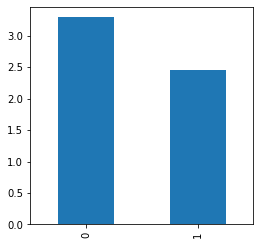

In [ ]:
explained_variance = pd.DataFrame(pca.explained_variance_)
explained_variance.head().plot.bar(legend=False, figsize=(4,4));

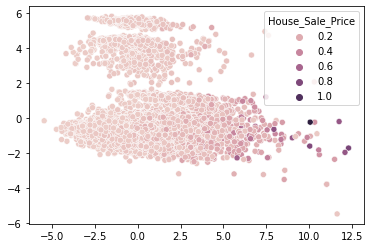

In [ ]:
sns.scatterplot(x=Z_scaled[:, 0], y=Z_scaled[:, 1], hue=y);

In [ ]:
coeff_pca = pd.DataFrame(pca.components_, columns=X.columns)
coeff_pca

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,Nbr_Living_Units,Sq_Ft_Fin_Basement,Yr_Built,Yr_Renovated,Newly_Construction,Property_Multiplex,Property_Single Family,Property_Townhouse
0,0.512082,0.117685,0.486892,0.383291,0.450928,0.051586,0.205596,0.268519,0.021177,0.121694,0.024686,0.036475,-0.048776
1,-0.097428,-0.092618,0.084312,-0.141620,0.056670,0.120033,-0.185344,0.326296,-0.130939,0.331622,0.145109,-0.579181,0.559194


#### Using a scaled output

In [ ]:
pca = PCA(n_components=2) # initialize PCA
X_trs = scale(X_train) # X train scaled
X_tss = scale(X_test) # X test scaled
pca.fit(X_scaled) # fit the PCA first
Xpca_trs = pca.transform(X_trs) # tranformation block
Xpca_tss = pca.transform(X_tss) # tranformation block
pcr = LinearRegression() # Principal component regression initialization
pcr.fit(Xpca_trs, y_train) # fitting block
print('R-Square:',pcr.score(Xpca_trs, y_train)) # scoring block

R-Square: 0.408671304032067


In [ ]:
# Using an unscaled output
Xpca= pca.transform(X_trs) # tranformation block
Xpcs= pca.transform(X_tss)
pcr.fit(Xpca, y_train) # fitting block
print('R-Square:',pcr.score(Xpca, y_train)) # scoring block

R-Square: 0.408671304032067


### Variable selection

In [ ]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=10, random_state=42), threshold=0.02) # added my threshold
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]
selected_features
#SelectFromModel()

Index(['Sq_Ft_Tot_Living', 'Sq_Ft_Lot', 'Bathroom_count', 'Bldg_Grade',
       'Sq_Ft_Fin_Basement', 'Yr_Built'],
      dtype='object')

In [ ]:
feat_selection_model = LinearRegression() # Initialize model
feat_selection_model.fit(X_train[selected_features],y_train) # fit the model on training data
feat_selection_model.score(X_train[selected_features],y_train) # score the model on training data
print('R-Square:',feat_selection_model.score(X_train[selected_features],y_train))
y_pred_feat_selection = feat_selection_model.predict(X_test[selected_features]) # predict on testing data
mae_feat_selection = mean_absolute_error(y_test, y_pred_feat_selection) # Determine the error
print(f'Mean Absolute Error: {mae_feat_selection}')

R-Square: 0.573924942860768
Mean Absolute Error: 137950.1101801365


Minor improvement from the PCA regression using less features but wether using all features or a select few we still dont exceed 58% accuracy.

### Linear model with regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
print('The accuracy using Linear regression is:' ,lr.score(X_train, y_train))

The accuracy using Linear regression is: 0.5852763840326671


We can see that ordinary linear regression seems to competively perform with these other methods.

## [Still to come]: 

I plan to add even more features and see if regression manages to shrink out the coefficients. I will in the next days 

* Add more hand crafted features: Square, Cube the colunms. The additional columns will not make physical sense, but you will be surprised by the increase in performance.
* Create categorical features out of numerical ones.
```
loan_data['score_factor'] = np.where(loan_data['borrower_score']> 0.5, True, False)
```

* Load the full dataset ('house.csv'). You will find even more features that you can use.

Also i may add multiple additional features and perform regularization

Stay tuned!